## Credits: Matthew Mcateer -- https://matthewmcateer.me/blog/basics-of-influence-functions/

In [2]:
import matplotlib.pyplot as plt
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
%config InlineBackend.figure_format = 'retina'

## Linear Model

In [ ]:
# class LinearModel:
    
#     def __init__(self, data, target):
#         self.data = data
#         self.target = target
#         self._prediction = None
#         self._optimize = None
#         self._error = None
#         self._gradients = None
#         self._hessians = None
#         self._params = None
        
#     @property
#     def params(self):
#         if  self._params is  None:
#             data_dim = int(self.data.get_shape()[1])
#             target_dim = int(self.target.get_shape()[1])
#             # we construct one variable for both weight and bias
#             self._params = tf.get_variable(name='params', shape=[data_dim+target_dim])
#         return  self._params

#     @property
#     def prediction(self):
#         if  self._prediction is  None:
#             data_dim = int(self.data.get_shape()[1])
#             W = tf.reshape(self.params[:-1], [data_dim,1])
#             b = self.params[-1]
#             self._prediction = tf.matmul(self.data, W) + b
#         return  self._prediction

#     @property
#     def error(self):
#         if  self._error is  None:
#             self._error = tf.losses.mean_squared_error(labels = self.target,
#             predictions = self.prediction)
#         return  self._error
    
#     @property
#     def optimize(self, lr  =  0.1):
#         if  self._optimize is  None:
#             train_op = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(self.error)
#             self._optimize = train_op
#         return  self._optimize

#     @property
#     def  gradients(self):
#         if  self._gradients is  None:
#             self._gradients = tf.gradients(self.error, self.params)
#         return  self._gradients

#     @property
#     def  hessians(self):
#         if  self._hessians is  None:
#             self._hessians = tf.hessians(self.error, self.params)
#         return  self._hessians

In [3]:
class LinearModel:
    
    def __init__(self, data, target):
        self.data = data
        print("Init-Data: ", data)
        self.target = target
        print("Init-Target: ", target)
        self._prediction = None
        self._optimize = None
        self._error = None
        self._gradients = None
        self._hessians = None
        self._params = None
        
    @property
    def params(self):
        if  self._params is  None:
            data_dim = int(self.data.get_shape()[1])
            print("Params-data_dim: ", data_dim)
            target_dim = int(self.target.get_shape()[1])
            print("Params-target_dim: ", target_dim)
            # we construct one variable for both weight and bias
            self._params = tf.get_variable(name='params', shape=[data_dim+target_dim])
            print("Params-total_dim: ", data_dim + target_dim)
        return  self._params

    @property
    def prediction(self):
        if  self._prediction is  None:
            data_dim = int(self.data.get_shape()[1])
            print("Prediction-data_dim: ", data_dim)
            W = tf.reshape(self.params[:-1], [data_dim,1])
            print("Prediction-W: ", W)
            b = self.params[-1]
            print("Prediction-b: ", b)
            self._prediction = tf.matmul(self.data, W) + b
        return  self._prediction

    @property
    def error(self):
        if  self._error is  None:
            self._error = tf.losses.mean_squared_error(labels = self.target,
            predictions = self.prediction)
            print("error-self._error: ", self._error)
        return  self._error
    
    @property
    def optimize(self, lr  =  0.1):
        if  self._optimize is  None:
            train_op = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(self.error)
            self._optimize = train_op
            print("optimize-self._optimize: ",self._optimize)
        return  self._optimize

    @property
    def  gradients(self):
        if  self._gradients is  None:
            self._gradients = tf.gradients(self.error, self.params)
            print("gradients-self._gradients", self._gradients)
        return  self._gradients

    @property
    def  hessians(self):
        if  self._hessians is  None:
            self._hessians = tf.hessians(self.error, self.params)
            print("hessians-self._hessians: ",self._hessians)
        return  self._hessians

In [4]:
def  true_function(x, noise  =  True):
    y = -5*x+5
    if noise:
        y += np.random.normal(scale=0.1, size = x.shape)
    return y

X_data = np.arange(-5,5,0.5).reshape((-1,1))
Y_data = true_function(X_data) # linear function
#perturbation
Y_data[1] = 100.0
Y_data[-5] = 100.0
Y_data = Y_data.reshape((-1,1))
X_test = 3.2*np.ones((1,1))
Y_test = true_function(X_test, noise=True)

In [5]:
EPOCHS = 100
R = 1
num_train_points = X_data.shape[0]

tf.reset_default_graph()
#tf.compat.v1.reset_default_graph()

x = tf.placeholder(dtype=tf.float32, shape=(None, 1))
y_true = tf.placeholder(dtype=tf.float32, shape=(None, 1))
model = LinearModel(x, y_true)
train_op = model.optimize
loss_op = model.error
param_op = model.params
gradient_op = model.gradients
hessian_op = model.hessians

Init-Data:  Tensor("Placeholder:0", shape=(?, 1), dtype=float32)
Init-Target:  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
Prediction-data_dim:  1
Params-data_dim:  1
Params-target_dim:  1
Params-total_dim:  2
Prediction-W:  Tensor("Reshape:0", shape=(1, 1), dtype=float32)
Prediction-b:  Tensor("strided_slice_1:0", shape=(), dtype=float32)
error-self._error:  Tensor("mean_squared_error/value:0", shape=(), dtype=float32)
optimize-self._optimize:  name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_params/ApplyGradientDescent"

gradients-self._gradients [<tf.Tensor 'gradients_1/AddN:0' shape=(2,) dtype=float32>]
hessians-self._hessians:  [<tf.Tensor 'Reshape_2:0' shape=(2, 2) dtype=float32>]


In [6]:
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    print("init_op: ",init_op)
    for e in  range(EPOCHS):
        fd = {x: X_data, y_true: Y_data}
        if e == 0: print("x, y_true: ", x, y_true)
        _, loss_epoch = sess.run([train_op, loss_op], feed_dict = fd)
    p = sess.run(param_op)
    s_test = 0
    for r in range(R):
        v = sess.run(gradient_op, feed_dict = {x:X_test, y_true:Y_test})[0]
        s_test_j = v
        print("r: ",r, " s_test_j: ",s_test_j, "\n")
        for j in  range(num_train_points):
            fd = {x:X_data[j].reshape((-1,1)), y_true:Y_data[j].reshape((-1,1))}
            hess_param = sess.run(hessian_op, feed_dict = fd)[0]
            hess_param = np.diag(hess_param)
            print("hess_param: ",hess_param)
            s_test_j = v + np.matmul((np.identity(2)-hess_param),s_test_j)
        s_test += s_test_j
    s_test = s_test/R
    print("s_test: ",s_test)
    importance = []
    for j in  range(num_train_points):
        fd = {x:X_data[j].reshape((-1,1)), y_true:Y_data[j].reshape((-1,1))}
        grad_param = sess.run(gradient_op, feed_dict = fd)[0]
        print("grad_param: ", grad_param)
        importance.append(-np.matmul(s_test,grad_param))
        print("importance_last: ", importance[-1])
    print("End of iter")
importance = np.asarray(importance)
print('Loss: {}'.format(((p[0]*X_test+p[1]-Y_test)**2)[0]))

2022-06-23 11:46:52.346953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-23 11:46:52.346995: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-23 11:46:52.347021: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pnans): /proc/driver/nvidia/version does not exist
2022-06-23 11:46:52.347368: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


init_op:  name: "init"
op: "NoOp"
input: "^params/Assign"

x, y_true:  Tensor("Placeholder:0", shape=(?, 1), dtype=float32) Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
r:  0  s_test_j:  [56.27774  17.586794] 

hess_param:  [50.  2.]
hess_param:  [40.5  2. ]
hess_param:  [32.  2.]
hess_param:  [24.5  2. ]
hess_param:  [18.  2.]
hess_param:  [12.5  2. ]
hess_param:  [8. 2.]
hess_param:  [4.5 2. ]
hess_param:  [2. 2.]
hess_param:  [0.5 2. ]
hess_param:  [0. 2.]
hess_param:  [0.5 2. ]
hess_param:  [2. 2.]
hess_param:  [4.5 2. ]
hess_param:  [8. 2.]
hess_param:  [12.5  2. ]
hess_param:  [18.  2.]
hess_param:  [24.5  2. ]
hess_param:  [32.  2.]
hess_param:  [40.5  2. ]
s_test:  [1.09140359e+22 1.09140359e+22]
grad_param:  [-93.39996   18.679993]
importance_last:  8.154964439321624e+23
grad_param:  [ 568.0373   -126.230515]
importance_last:  -4.821895042734913e+24
grad_param:  [-74.50485   18.626213]
importance_last:  6.098614754240534e+23
grad_param:  [-63.755783  18.215939]
impor

In [12]:
importance

array([ 8.15496444e+23, -4.82189504e+24,  6.09861475e+23,  4.97023499e+23,
        4.09513992e+23,  2.98628805e+23,  2.00289446e+23,  9.90761720e+22,
       -0.00000000e+00, -9.80567906e+22, -1.92731131e+23, -2.88787816e+23,
       -3.89860409e+23, -4.89819737e+23, -5.86178079e+23,  7.54120313e+24,
       -7.70866633e+23, -8.60041426e+23, -9.41488185e+23, -1.03136644e+24])

In [ ]:
# EPOCHS = 100
# R = 200
# num_train_points = X_data.shape[0]

# tf.reset_default_graph()
# #tf.compat.v1.reset_default_graph()

# x = tf.placeholder(dtype=tf.float32, shape=(None, 1))
# y_true = tf.placeholder(dtype=tf.float32, shape=(None, 1))
# model = LinearModel(x, y_true)
# train_op = model.optimize
# loss_op = model.error
# param_op = model.params
# gradient_op = model.gradients
# hessian_op = model.hessians

# init_op = tf.global_variables_initializer()

# with tf.Session() as sess:
#     sess.run(init_op)
#     for e in  range(EPOCHS):
#         fd = {x: X_data, y_true: Y_data}
#         _, loss_epoch = sess.run([train_op, loss_op], feed_dict = fd)
#     p = sess.run(param_op)
#     s_test = 0
#     for r in  range(R):
#         v = sess.run(gradient_op, feed_dict = {x:X_test, y_true:Y_test})[0]
#         s_test_j = v
#         for j in  range(num_train_points):
#             fd = {x:X_data[j].reshape((-1,1)), y_true:Y_data[j].reshape((-1,1))}
#             hess_param = sess.run(hessian_op, feed_dict = fd)[0]
#             hess_param = np.diag(hess_param)
#             s_test_j = v + np.matmul((np.identity(2)-hess_param),s_test_j)
#         s_test += s_test_j
#     s_test = s_test/R
#     importance = []
#     for j in  range(num_train_points):
#         fd = {x:X_data[j].reshape((-1,1)), y_true:Y_data[j].reshape((-1,1))}
#         grad_param = sess.run(gradient_op, feed_dict = fd)[0]
#         importance.append(-np.matmul(s_test,grad_param))

# importance = np.asarray(importance)
# print('Loss: {}'.format(((p[0]*X_test+p[1]-Y_test)**2)[0]))

In [ ]:
hess_param.shape

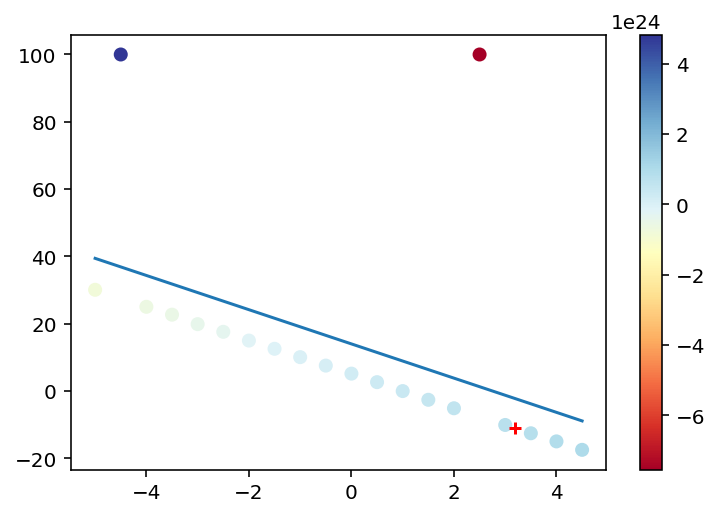

In [8]:
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(X_data.flatten(), Y_data.flatten(), label='train',c=-importance, cmap=cm)
plt.scatter(X_test.flatten(), Y_test.flatten(),marker='+',label='test',c='r')
plt.plot(X_data, p[0]*X_data+p[1])
plt.colorbar(sc)
plt.show()

In [15]:
max(-importance)

4.821895042734913e+24

In [16]:
min(-importance)

-7.541203131193803e+24

In [21]:
-importance[-5]

-7.541203131193803e+24

## Influence Functions

In [ ]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Gets number of 7 and 1 labels in MNIST
num_test = len(np.argwhere(y_test == 7)) + len(np.argwhere(y_test == 1))
# Creating an empty array of blank data, with all labels being 1
test = np.zeros((num_test, 784))
test_label = np.zeros((num_test, 1))

In [ ]:
count = 0

for i in  range(len(x_test)):
    if y_test[i] == 7:
        test[count] += (x_test[i] / np.linalg.norm(x_test[i])).reshape(784)
        test_label[count] += np.array([1.0])
        count += 1
        if count == num_test:
            break
    elif y_test[i] == 1:
        test[count] += (x_test[i] / np.linalg.norm(x_test[i])).reshape(784)
        test_label[count] += np.array([0.0])
        count += 1
        if count == num_test:
            break

# We repeat this process on the training data
num_train = len(np.argwhere(y_train == 7)) + len(np.argwhere(y_train == 1))
data = np.zeros((num_train, 784))
data_label = np.zeros((num_train, 1))
count = 0
for i in  range(len(x_train)):
    if y_train[i] == 7:
        data[count] += (x_train[i] / np.linalg.norm(x_train[i])).reshape(784)
        data_label[count] += np.array([1.0])
        count += 1
        if count == num_train:
            break
    elif y_train[i] == 1:
        data[count] += (x_train[i] / np.linalg.norm(x_train[i])).reshape(784)
        data_label[count] += np.array([0.0])
        count += 1
        if count == num_train:
            break

# We're going to set a test index. This is an index within the training data
# where we want to see how well our classifier performs on it
test_index = 157
plt.imshow(test[test_index].reshape(28, 28),cmap="inferno", interpolation="nearest")


In [ ]:
def hinge_loss(logits, labels, dty=tf.float64):
    margin = tf.multiply(tf.cast(labels, dtype=dty), logits)
    log_loss = tf.maximum(tf.constant(0, dtype=dty), 1 - margin)
    return tf.reduce_mean(log_loss)

def smooth_hinge_loss(logits, labels, t=1e-3, dty=tf.float64):
    margin = tf.multiply(tf.cast(labels, dtype=dty), logits)
    exponents = (1 - margin) / t
    max_elems = tf.maximum(exponents, tf.zeros_like(exponents))
    log_loss = t * (max_elems + tf.log(tf.exp(exponents - max_elems) + tf.exp(tf.zeros_like(exponents) - max_elems)))
    return tf.reduce_mean(log_loss)

def get_accuracy_op(logits, labels, sigmoid=True, dty=tf.float64):
    if sigmoid:
        correct_prediction = tf.equal(tf.cast(L > 0.5, tf.int32), tf.cast(labels, tf.int32))
        accuracy = tf.reduce_sum(tf.cast(correct_prediction, tf.int32))
        return accuracy / tf.shape(labels)[0]
    else:
        preds = tf.sign(logits)
        correct = tf.reduce_sum(tf.cast(tf.equal(preds, tf.cast(labels, dty)), tf.int32))
        return correct / tf.shape(labels)[0]

def hessian_vector_product(ys, xs, v, do_not_sum_up=True):
    # Validate the input
    length = len(xs)
    if  len(v) != length:
        raise  ValueError("xs and v must have the same length.")
    # First backprop
    grads = tf.gradients(ys, xs)
    # grads = xs
    assert  len(grads) == length
    elemwise_products = [
        tf.multiply( grad_elem, tf.stop_gradient(v_elem)) for grad_elem, v_elem in  zip(grads, v) if grad_elem is  not  None
    ]
    # math_ops.multiply( grad_elem, array_ops.stop_gradient(v_elem)) for grad_elem, v_elem in  zip(grads, v) if grad_elem is  not  None
    # Second backprop
    if do_not_sum_up:
        seperate = []
        for i in  range(length):
            seperate.append(tf.gradients(elemwise_products[i], xs[i])[0])
        grads_with_none = seperate
    else:
        grads_with_none = tf.gradients(elemwise_products, xs)
    return_grads = [
        grad_elem if grad_elem is  not  None  else tf.zeros_like(x) for x, grad_elem in  zip(xs, grads_with_none)
    ]
    return return_grads

In [ ]:
tf.reset_default_graph()
nb_clases = 1
dty = tf.float64
scale = 1e0
damping = 1e-2

I = tf.eye(784, dtype=dty)
we = {}
we[0] = 784 * 1
w1 = tf.get_variable("w1", [we[0]], initializer=tf.initializers.truncated_normal, dtype=dty)
w1 = w1 / tf.norm(w1)
w1 = w1 / tf.constant(1e6, dtype=dty)
params = [w1]

Hess = tf.placeholder(dty, shape=[w1.get_shape()[0], w1.get_shape()[0]], name="inverse")
cur_in = tf.placeholder(dty, shape=[w1.get_shape()[0], w1.get_shape()[0]], name="inverse")
v_cur_est = [tf.placeholder(dty, shape=a.get_shape(), name="v_cur_est" + str(i)) for i, a in  enumerate(params)]
hessian_vector_val_place = [tf.placeholder(dty, shape=a.get_shape()[0], name="hessian_vector_val_place" + str(i)) for i, a in  enumerate(params)]
Test = [tf.placeholder(dty, shape=a.get_shape(), name="v_cur_est" + str(i)) for i, a in  enumerate(params)]

X = tf.placeholder(dty, [None, 784], name="X")
Y = tf.placeholder(dty, [None, nb_clases], name="Y")
L = tf.matmul(X, tf.reshape(w1, [-1, 1]))
L = tf.nn.sigmoid(L)

Z = tf.placeholder(dty, [None, 784], name="Z")
Y_of_Z_train = tf.placeholder(dty, [None, nb_clases], name="Y_of_Z_train")
L_Z = tf.matmul(Z, tf.reshape(w1, [-1, 1]))
L_Z = tf.nn.sigmoid(L_Z)

Z_test = tf.placeholder(dty, [None, 784], name="Z_test")
Y_test = tf.placeholder(dty, [None, nb_clases], name="Y_test")
L_test = tf.matmul(Z_test, tf.reshape(w1, [-1, 1]))
L_test = tf.nn.sigmoid(L_test)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(L + 1e-6) + (1 - Y) * tf.log(1 - L + 1e-6), 1))
cost += damping * tf.nn.l2_loss(params) # gradient vanishing

upweighting_loss = tf.reduce_mean(-tf.reduce_sum(Y_of_Z_train * tf.log(L_Z + 1e-6) + (1 - Y_of_Z_train) * tf.log(1 - L_Z + 1e-6), 1))
upweighting_loss += damping * tf.nn.l2_loss(params) # gradient vanishing

Test_loss = tf.reduce_mean(-tf.reduce_sum(Y_test * tf.log(L_test + 1e-6) + (1 - Y_test) * tf.log(1 - L_test + 1e-6), 1))
Test_loss += damping * tf.nn.l2_loss(params) # gradient vanishing


In [ ]:
# grads
test_grad = tf.gradients(Test_loss, params)
train_grad = tf.gradients(upweighting_loss, params)

# Hessians
true_hess = tf.hessians(cost, params)

# H dot v
hessian_vector_val = hessian_vector_product(cost, params, v_cur_est, True)

# H inverse
estimation_IHVP = [ g + cur_e - HV / scale for g, HV, cur_e in  zip(Test, hessian_vector_val, v_cur_est)]
estimation_inverse = (I + cur_in - tf.matmul(Hess, cur_in) / scale)

In [ ]:
train_op = tf.train.AdamOptimizer(1e-2).minimize(cost)
accuracy = get_accuracy_op(L, Y)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
  
for epoch in range(1501):
    for i in range(26):
        batch_xs, batch_ys = (data[i * 500 : (i + 1) * 500], data_label[i * 500 : (i + 1) * 500])
        _ = sess.run([train_op], feed_dict={X: batch_xs, Y: batch_ys})
    if epoch % 500 == 0  and epoch > 0:
        c = sess.run(accuracy, feed_dict={X: test, Y: test_label})
        a = sess.run(accuracy, feed_dict={X: data, Y: data_label})
        ccc = sess.run(cost, feed_dict={X: test, Y: test_label})
        print("Train accuracy: ", a, " Test accuracy: ", c, " cost: ", ccc)
print("sum of parameters: ", sess.run(tf.nn.l2_loss(params)).sum())

In [ ]:
# Numpy Direct Inverse

true_h = sess.run(true_hess[0], feed_dict={X: data, Y: data_label})
inv = np.linalg.inv(true_h)
np.linalg.norm(true_h)

In [ ]:
cur_estimate = sess.run(I)
#start_time = time.time()
for j in  range(5001):
    cur_estimate = sess.run(estimation_inverse, feed_dict={Hess: true_h, cur_in: cur_estimate})
inverse = cur_estimate / scale
#duration = time.time() - start_time
#print("Inverse Hessian by Lissa: took %s minute %s sec" % (duration // 60, duration % 60))

In [ ]:
print("Lissa Identity Error: ", abs(np.dot(true_h, inverse) - np.eye(784)).sum())
print("Numpy Identity Error: ", abs(np.dot(true_h, inv) - np.eye(784)).sum())
print("Inverse Error: ", abs(inverse - inv).sum())

In [ ]:
test_val = sess.run(
    test_grad,
    feed_dict={
        Z_test: test[test_index].reshape((1, 784)),
        Y_test: test_label[test_index].reshape((1, 1)),
    },
)
IHVP = np.dot(test_val[0], inv)
# start_time = time.time()
cur_estimate = test_val.copy()
feed1 = {place: cur for place, cur in zip(Test, test_val)}
for j in range(5001):
    feed2 = {place: cur for place, cur in zip(v_cur_est, cur_estimate)}
    r = np.random.randint(len(data), size=[1024])
    cur_estimate = sess.run(
        estimation_IHVP,
        feed_dict={
            X: data[r],
            Y: data_label[r],
            **feed1,
            **feed2,
        },
    )
    if j % 2500 == 0  and j > 0:
        print(cur_estimate[0][0])
inverse_hvp = [b / scale for b in cur_estimate]
# duration = time.time() - start_time
# print("Inverse HVP by HVPs+Lissa: took %s minute %s sec" % (duration // 60, duration % 60))
print(abs(IHVP - inverse_hvp[0]).sum())

In [ ]:
# s = time.time()

val_lissa = []
for i in range(num_train):
    if data_label[i][0] == test_label[test_index][0]:
        train_grad_loss_val = sess.run(
            train_grad,
            feed_dict={
                Z: data[i].reshape((1, 784)),
                Y_of_Z_train: data_label[i].reshape((1, 1)),
            },
        )
        val_lissa.append([i, np.dot(np.concatenate(inverse_hvp), np.concatenate(train_grad_loss_val))])
# duration = time.time() - s
# print("Multiplying by %s train examples took %s minute %s sec" % (1, duration // 60, duration % 60))
val_lissa = sorted(val_lissa, key=lambda x: x[1])

In [ ]:
# s = time.time()
val = []
for i in  range(num_train):
    if data_label[i][0] == test_label[test_index][0]:
        train_grad_loss_val = sess.run(
            train_grad,
            feed_dict={
                Z: data[i].reshape((1, 784)),
                Y_of_Z_train: data_label[i].reshape((1, 1)),
            },
        )
        val.append([i, np.dot(IHVP, np.concatenate(train_grad_loss_val))])
# duration = time.time() - s
# print("Multiplying by %s train examples took %s minute %s sec" % (1, duration // 60, duration % 60))
val = sorted(val, key=lambda x: x[1])

In [ ]:
print("Numpy IHVP",
      "\nMost Harmful Indexes", [val[i][0] for i in  range(0, 6)],
      "\nMost Helpful Indexes", [val[i][0] for i in  range(-1, -7, -1)])
print("Lissa IHVP",
      "\nMost Harmful Indexes", [val_lissa[i][0] for i in  range(0, 6)],
      "\nMost Helpful Indexes", [val_lissa[i][0] for i in  range(-1, -7, -1)])

In [ ]:
fig = plt.figure(figsize=(16, 4))
image_details = [
    ["Test_image", test[test_index]],
    ["Harmful_image1", data[val[0][0]]],
    ["Harmful_image2", data[val[1][0]]],
    ["Harmful_image3", data[val[2][0]]],
    ["Harmful_image4", data[val[3][0]]],
    ["Harmful_image5", data[val[4][0]]],
    ["Harmful_image6", data[val[5][0]]]]
for i in  range(1, 8):
    ax = plt.subplot(1, 7, i)
    plt.imshow(image_details[i-1][1].reshape(28, 28), cmap="inferno", interpolation="nearest")
    ax.set_title(image_details[i-1][0])
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 4))

image_details = [
    ["Test_image", test[test_index]],
    ["Positive_image1", data[val[-1][0]]],
    ["Positive_image2", data[val[-2][0]]],
    ["Positive_image3", data[val[-3][0]]],
    ["Positive_image4", data[val[-4][0]]],
    ["Positive_image5", data[val[-5][0]]],
    ["Positive_image6", data[val[-6][0]]]]

for i in  range(1, 8):
    ax = plt.subplot(1, 7, i)
    plt.imshow(image_details[i-1][1].reshape(28, 28), cmap="inferno", interpolation="nearest")
    ax.set_title(image_details[i-1][0])
plt.tight_layout()
plt.show()

## NN Implementation

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
# TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
# TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [ ]:
# x_train = features, y_train = target
train_data = pd.read_csv('california_housing_train.csv')
test_data = pd.read_csv('california_housing_test.csv')
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [ ]:
def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train), columns=x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test), columns = x_test.columns)
    
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
    return model
# build the model
model = build_model_using_sequential()

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

In [ ]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
x_test['prediction'] = model.predict(x_test_scaled)
x_test

In [ ]:
#y_train.reshape(17000,1)
#y_train.reshape((17000, 1))

arr = y_train.values
y_train = arr.reshape((17000, 1))


arr = y_test.values
y_test = arr.reshape((3000, 1))

In [ ]:
x_train_scaled = x_train_scaled.to_numpy()

In [ ]:
x_test_scaled = x_test_scaled.to_numpy()

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
EPOCHS = 100
R = 2
num_train_points = x_train_scaled.shape[0]

tf.reset_default_graph()
#tf.compat.v1.reset_default_graph()

x = tf.placeholder(dtype=tf.float32, shape=(None, 8))
y_true = tf.placeholder(dtype=tf.float32, shape=(None, 1))

model = LinearModel(x, y_true)
train_op = model.optimize
loss_op = model.error
param_op = model.params
gradient_op = model.gradients
hessian_op = model.hessians

In [ ]:
# Init-Data:  Tensor("Placeholder:0", shape=(?, 1), dtype=float32)
# Init-Target:  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
# Prediction-data_dim:  1
# Params-data_dim:  1
# Params-target_dim:  1
# Params-total_dim:  2
# Prediction-W:  Tensor("Reshape:0", shape=(1, 1), dtype=float32)
# Prediction-b:  Tensor("strided_slice_1:0", shape=(), dtype=float32)
# error-self._error:  Tensor("mean_squared_error/value:0", shape=(), dtype=float32)
# optimize-self._optimize:  name: "GradientDescent"
# op: "NoOp"
# input: "^GradientDescent/update_params/ApplyGradientDescent"

# gradients-self._gradients [<tf.Tensor 'gradients_1/AddN:0' shape=(2,) dtype=float32>]
# hessians-self._hessians:  [<tf.Tensor 'Reshape_2:0' shape=(2, 2) dtype=float32>]

In [ ]:
# EPOCHS = 100
# R = 2
# num_train_points = x_train_scaled.shape[0]

# tf.reset_default_graph()
# #tf.compat.v1.reset_default_graph()

# x = tf.placeholder(dtype=tf.float32, shape=(None, 8))
# y_true = tf.placeholder(dtype=tf.float32, shape=(None, 1))

# model = LinearModel(x, y_true)
# train_op = model.optimize
# loss_op = model.error
# param_op = model.params
# gradient_op = model.gradients
# hessian_op = model.hessians

# init_op = tf.global_variables_initializer()
# i = 0

# with tf.Session() as sess:
#     print("Hello-1", i)
#     sess.run(init_op)
#     for e in  range(EPOCHS):
#         fd = {x: x_train_scaled, y_true: y_train}
#         _, loss_epoch = sess.run([train_op, loss_op], feed_dict = fd)
#     p = sess.run(param_op)
#     s_test = 0
#     for r in  range(R):
#         print("Hello-2", i, r)
#         v = sess.run(gradient_op, feed_dict = {x:x_test_scaled, y_true:y_test})[0]
#         s_test_j = v
#         for j in  range(num_train_points):
# #             print(x_train_scaled[j].reshape(1,-1).shape)
# #             print(y_train[j])
# #             break
#             print("Hello-3", i, j)
#             fd = {x:x_train_scaled[j].reshape((1,-1)), y_true:y_train[j].reshape((-1,1))}
#             hess_param = sess.run(hessian_op, feed_dict = fd)[0]
#             hess_param = np.diag(hess_param)
#             s_test_j = v + np.matmul((np.identity(9)-hess_param),s_test_j)
#         s_test += s_test_j
#     s_test = s_test/R
#     importance = []
#     for j in  range(num_train_points):
#         print("Hello-4", i, j)
#         fd = {x:x_train_scaled[j].reshape((1,-1)), y_true:y_train[j].reshape((-1,1))}
#         grad_param = sess.run(gradient_op, feed_dict = fd)[0]
#         importance.append(-np.matmul(s_test,grad_param))
#     i += 1

# importance = np.asarray(importance)
# print('Loss: {}'.format(((p[0]*x_test_scaled+p[1]-y_test)**2)[0]))

In [ ]:
importance

In [ ]:
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(x_test_scaled.flatten(), y_test.flatten(), label='train',c=-importance, cmap=cm)
plt.scatter(X_test.flatten(), Y_test.flatten(),marker='+',label='test',c='r')
plt.plot(X_data, p[0]*X_data+p[1])
plt.colorbar(sc)
plt.show()